 # Algoritmo di Metropolis - modello Ising

Sfruttando l'algoritmo di Metropolis (ed in alternativa quello di Gibbs), simulare un modello di Ising 1D nella seguente configurazione:
- 50 spin di valori assegnati  $\pm$1;
- PBC: ovvero il primo ed il 50-esimo spin sono primi vicini tra loro;
- unità ridotte: $k_b=1$ e $\mu_b=1$;
- una configurazione energetica del sistema definita da: 
$$ H = -\frac{1}{2}\sum_{i,j=1}^N J_{ij} \sigma_i \sigma_{j} - h\sum_{i=1}^N \sigma_i $$
dove la parte quadratica nello spin è limitata ai primi vicini a distanza 1, $J_{ij}$ è una costante arbitraria che detta le proprietà magnetiche del materiale e h è una costante arbitraria di campo magnetico esterno;
- step di simulazione pari a 50 azioni dell'algoritmo utilizzato;
- simulazione di almeno $10^5$ step;
- equilibrazione del sistema per almeno $10^4$ step;


Si utilizzi l'algoritmo di metropolis secondo:
- $T(\nu|\mu)$: flip di uno spin casuale;
- $A(\nu|\mu)$: legato all'energia del sistema nella configurazione attuale e in quella proposta secondo:
$$ A(\nu|\mu) = min[1,e^{-\beta(E_\nu-E_\mu)}]$$
dove $(E_\nu-E_\mu) = 2Js_\mu\sum_{<ij>}s_\mu + 2s_\mu h$ e $\beta=\frac{1}{k_bT}$. Tale accettazione è anche detta peso statistico di Boltzmann;

Si utilizzi l'algoritmo di Gibbs come variante di quello di Metropolis secondo:
- $A=1$;
- $T(x|y)= \frac{p(x)}{p(x)+p(y)}$ dove p(x) definisce la probabilità congiunta di modificare uno spin casuale in un verso arbitrario, mentre la somma $( p_{(x)}+p_{(y)} )$ definisce la probabilità marginale di esplorare entrambe le configurazioni di spin permesse. Più semplicemente:
$$ T(x|y)=p(s'_k=\pm1)|\{s_j:j\neq k\}=\frac{1}{1+exp(-\beta\Delta E_{s_k=\mp1 \rightarrow s_k=\pm1})}=\frac{1}{1+exp \ ( \ \mp 2\beta J \sum_{<ij>}s_k \mp2\beta h \ )} $$

Si implementi, inoltre, l'algoritmo statistico di media a blocchi per il calcolo degli errori secondo:
- N= 50 blocchi;
- L= $10^4$ step di simulazione per blocco, per assicurarsi di scorrelare i valori in blocchi successivi;

Si definiscono, infine, arbitrariamente:
- J= 1;
- T= [0.5,2.1];

Da tale simulazione ricavare alcune osservabili legate alla meccanica statistica e relative incertezze:
1. energia interna: $U(N,T)$;
2. capacità termica: $C(N,T)$; 
3. suscettibilità magnetica: $\chi(N,T)$;
4. magnetizzazione: $M(N,T,h=0.02)$;

Confrontare, infine, i risultati ottenute alle varie temperature con le risoluzioni analitiche note.\
(Si simulerà a T diverse con i diversi algoritmi, così da meglio visualizzare i grafici e comparare i risultati contemporaneamente con la curva analitica nota, piuttosto che tra loro che sarebbe inutilmente complesso su singoli punti con barre di errore limitate.) 

#### - Energia Interna:
Sia h=0, è possibile ricavare l'energia interna per particella secondo:
$$\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}= [...] = -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

Si importino i risultati della simulazione ottenuti per h=0 per alcune delle variabili che si vogliono indagare, e si produca un grafico per la sola osservabile $\frac{U(N,T)}{N}$ contenente:
- le stime per alcune temperature in [0.5,2] dell'osservabile ottenute con l'algoritmo di Metropolis con il peso di Bolzmann;
- le stime per alcune temperature in [0.6,2.1] dell'osservabile ottenute con l'algoritmo di Gibbs;
- una sezione della curva analitica dell'osservabile;

In [1]:

import numpy


T_m, U_m, errU_m, C_m, errC_m, X_m, errX_m= numpy.loadtxt( "6.1/out_metro_h=0.000000", 
                                                                       usecols= (0,2,3,4,5,8,9), 
                                                                       delimiter= "\t", unpack= 'true' )
T_g, U_g, errU_g, C_g, errC_g, X_g, errX_g= numpy.loadtxt( "6.1/out_gibbs_h=0.000000", 
                                                                       usecols= (0,2,3,4,5,8,9), 
                                                                       delimiter= "\t", unpack= 'true' )


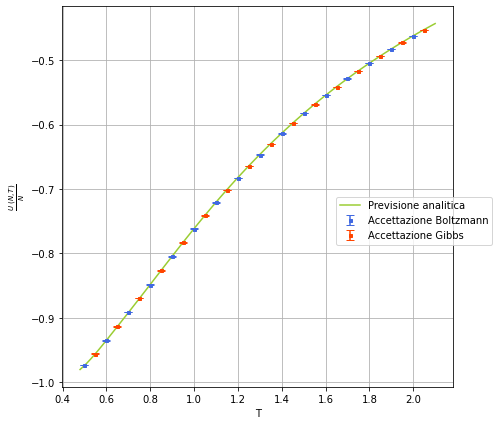

In [2]:

import matplotlib.pyplot as plt


plt.figure(figsize=(7, 7))

points= 100
T= numpy.linspace(0.48,2.1,num=points)
beta= 1/T
J= 1.0
Ns= 50
th= numpy.tanh(J/T)
thN= th**Ns
ch= 1/th
e= -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e, linestyle= "solid", color= "yellowgreen", label= "Previsione analitica")

plt.errorbar( T_m, U_m, yerr= errU_m, capsize= 4, marker= 's', mfc= 'royalblue', mec= 'royalblue', ms= 3, 
              linestyle= "none", color= "royalblue", label= "Accettazione Boltzmann")

plt.errorbar( T_g, U_g, yerr= errU_g, capsize= 4, marker= 's', mfc= 'orangered', mec= 'orangered', ms= 3, 
              linestyle= "none", color= "orangered", label= "Accettazione Gibbs")

plt.xlabel('T')
plt.ylabel(r'$\frac{U \ (N,T)}{N}$')
#plt.title( "Energia interna per particella" )
plt.grid(True)
plt.legend(bbox_to_anchor=(0.7, 0.5), loc='upper left', borderaxespad=0.)

plt.show()


#### - Capacità termica:
Sia h=0, si ricava la capacità termica per particella:

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T}= [...] =
\frac{1}{N}k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right) =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

Con i risultati importati ottenuti per h=0  si produca un grafico per l'osservabile $\frac{C(N,T)}{N}$ contenente:
- le stime per alcune temperature in [0.5,2] ottenute con l'algoritmo di Metropolis con il peso di Bolzmann;
- le stime per alcune temperature in [0.6,2.1] ottenute con l'algoritmo di Gibbs;
- una sezione della curva analitica dell'osservabile;

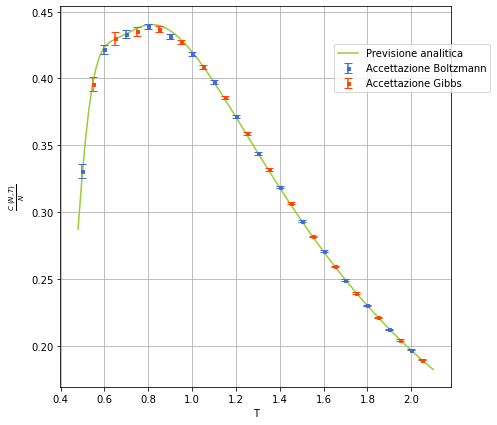

In [3]:

plt.figure(figsize=(7, 7))

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat, linestyle= "solid", color= "yellowgreen", label= "Previsione analitica")

plt.errorbar( T_m, C_m, yerr= errC_m, capsize= 4, marker= 's', mfc= 'royalblue', mec= 'royalblue', ms= 3, 
              linestyle= "none", color= "royalblue", label= "Accettazione Boltzmann")

plt.errorbar( T_g, C_g, yerr= errC_g, capsize= 4, marker= 's', mfc= 'orangered', mec= 'orangered', ms= 3, 
              linestyle= "none", color= "orangered", label= "Accettazione Gibbs")

plt.xlabel('T')
plt.ylabel(r'$\frac{C \ (N,T)}{N}$')
plt.grid(True)
#plt.title( "Capacità termica per particella" )
plt.legend(bbox_to_anchor=(0.7, 0.9), loc='upper left', borderaxespad=0.)

plt.show()


#### - Suscettibilità magnetica:
Sia h=0, è possibile ricavare la scuscettibilità magnetica:
$$
\chi(N,T) = \frac{\partial M}{\partial h}= [...] =
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$
dove M(N,T,h) è la magnetizzione (che si vedrà in seguito come trattare) e dove si riconosce essere $\left\langle \sum_{i=1,N}s_i \right\rangle^2 = 0$ per h= $0$.

Si produca un grafico per l'osservabile $\chi_{(N,T)}$ contenente:
- le stime per alcune temperature in [0.5,2] ottenute con l'algoritmo di Metropolis con il peso di Bolzmann;
- le stime per alcune temperature in [0.6,2.1] ottenute con l'algoritmo di Gibbs;
- una sezione della curva analitica dell'osservabile;

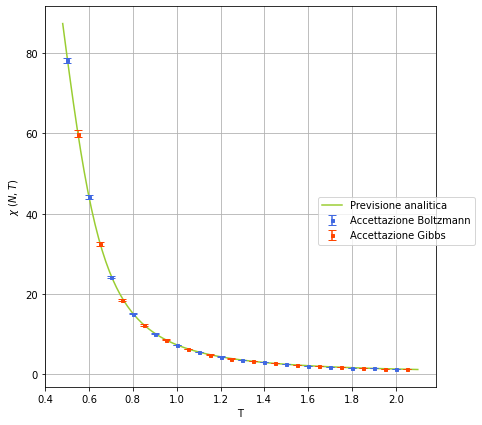

In [4]:

plt.figure(figsize=(7, 7))

X = beta*numpy.exp(2*beta*J)*(1-thN)/(1+thN)

plt.plot(T, X, linestyle= "solid", color= "yellowgreen", label= "Previsione analitica")

plt.errorbar( T_m, X_m, yerr= errX_m, capsize= 4, marker= 's', mfc= 'royalblue', mec= 'royalblue', ms= 3, 
              linestyle= "none", color= "royalblue", label= "Accettazione Boltzmann")

plt.errorbar( T_g, X_g, yerr= errX_g, capsize= 4, marker= 's', mfc= 'orangered', mec= 'orangered', ms= 3, 
              linestyle= "none", color= "orangered", label= "Accettazione Gibbs")

plt.xlabel('T')
plt.ylabel(r'$\chi \ (N,T)$')
#plt.title( "Suscettibilità magnetica" )
plt.grid(True)
plt.legend(bbox_to_anchor=(0.7, 0.5), loc='upper left', borderaxespad=0.)

plt.show()


#### - Magnetizzzazione:
Si definisce la funzione di partizione per il sistema considerato a partire dall'Hamiltoniana:
$$Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N$$
Con tale funzione si definisce di conseguenza l'energia libera di Helmholtz, che è una buona funzione per descrivere un sistema a contatto con un bagno termico e con un campo esterno non nullo:
$$A = -k_B T \ln Z$$

Per ogni h, allora la magnetizzazione è: $M(N,T,h) = -\frac{\partial A}{\partial h}$.\
Sono noti alcuni casi particolari:
- h$=$0:  
$$M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$$
- h$\neq$0, eseguendo la derivata e calcolando per particella: 

$$\frac{M(N,T,h)}{N} = [...] =\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]$$


Si importino i risultati della simulazione ottenuti per h=0.02 per l'osservabile $M(N,T,h)$ e si produca un grafico contenente:
- le stime in [0.5,2] dell'osservabile ottenute con l'algoritmo di Metropolis con il peso di Bolzmann;
- le stime in [0.6,2.1] dell'osservabile ottenute con l'algoritmo di Gibbs;
- una sezione della curva analitica dell'osservabile;

In [5]:

M_m, errM_m= numpy.loadtxt( "6.1/out_metro_h=0.020000", usecols= (6,7), delimiter= "\t", unpack= 'true' )
M_g, errM_g= numpy.loadtxt( "6.1/out_gibbs_h=0.020000", usecols= (6,7), delimiter= "\t", unpack= 'true' )
h=0.02


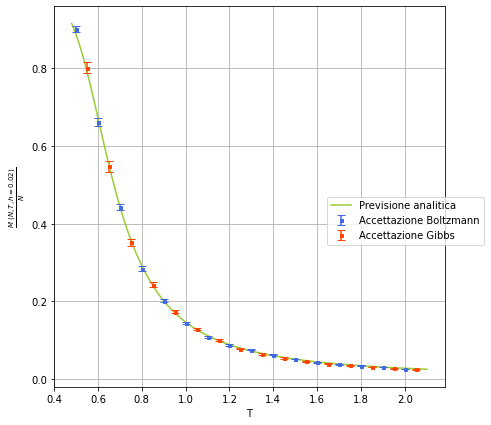

In [6]:

plt.figure(figsize=(7, 7))

l1 = numpy.exp(beta*J)*numpy.cosh(beta*h)+numpy.sqrt(numpy.exp(2*beta*J)*numpy.cosh(beta*h)*numpy.cosh(beta*h)-2*numpy.sinh(2*beta*J))
l2 = numpy.exp(beta*J)*numpy.cosh(beta*h)-numpy.sqrt(numpy.exp(2*beta*J)*numpy.cosh(beta*h)*numpy.cosh(beta*h)-2*numpy.sinh(2*beta*J))
Z = l1**Ns + l2**Ns
M = (numpy.exp(beta*J)*numpy.sinh(beta*h)*((l1**(Ns-1))*(1+numpy.exp(beta*J)*numpy.cosh(beta*h)/numpy.sqrt(numpy.exp(2*beta*J)*numpy.cosh(beta*h)*numpy.cosh(beta*h)-2*numpy.sinh(2*beta*J))) 
        + (l2**(Ns-1))*(1-numpy.exp(beta*J)*numpy.cosh(beta*h)/numpy.sqrt(numpy.exp(2*beta*J)*numpy.cosh(beta*h)*numpy.cosh(beta*h)-2*numpy.sinh(2*beta*J)))))/(Z)
plt.plot(T, M, linestyle= "solid", color= "yellowgreen", label= "Previsione analitica")

plt.errorbar( T_m, M_m, yerr= errM_m, capsize= 4, marker= 's', mfc= 'royalblue', mec= 'royalblue', ms= 3, 
              linestyle= "none", color= "royalblue", label= "Accettazione Boltzmann")

plt.errorbar( T_g, M_g, yerr= errM_g, capsize= 4, marker= 's', mfc= 'orangered', mec= 'orangered', ms= 3, 
              linestyle= "none", color= "orangered", label= "Accettazione Gibbs")

plt.xlabel('T')
plt.ylabel(r'$\frac{M \ (N,T,h=0.02)}{N}$')
#plt.title( "Magnetizzazione" )
plt.grid(True)
plt.legend(bbox_to_anchor=(0.7, 0.5), loc='upper left', borderaxespad=0.)

plt.show()


#### - Osservazioni:
Come è possibile notare entrambi gli algoritmi proposti sono in accordo con la curva analitica fornita.\
Appare, inoltre, evidente come gli errori dell'algoritmo con accettazione di Gipps siano maggiori, ma ciò non è inaspettato. Accettare qualsiasi mossa già presuppone una problematica violando l'indicazione esperienziale di mantenere essa intono al 50%. Ovviamente ciò avviene a fronte di una valutazione complessa della funzione di transizione $T(x|y)$ che tuttavia però non garantisce movimenti sempre favorevoli energeticamente al sistema.

Infine, si noti come all'aumentare delle temperature si riduca generalmente l'errore associato, sebbene l'algoritmo delle medie di blocco sia sempre il medesimo, con le medesime grandezze di blocco e numero di blocchi. Ciò in generale sembra dipendere dalla forma delle funzioni indagate (nelle forme di derivate) nelle quali la temperatura compare come inverso nella forma della costante $\beta$ = 1/T, che spesso riportano termini potenzialmente divergenti in tale fattore.\
Come interpretazione fisica, tuttavia, ci si aspetterebbe qualcosa di differente: infatti, a temperature prossime allo zero ci si attende poca attività del sistema e quindi una minor varietà di configurazioni esplorabili, di contro, ad alte T ci si attende ampie esplorazioni del sistema in tutto lo spazio concesso.\
Si conclude che quanto osservato possa rientrare nei limiti di una simulazione di breve durata e con numerose approssimazioni introdotte che comunque produce risultati ampiamente compatibili con uno studio analitico. 